In [26]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score

In [27]:
dataFrame = pd.read_csv('data/global-food.csv')


In [28]:
dfFood = dataFrame.query('Year==2018')[['Country', 'Food supply (Fat g per capita per day)', 'Food supply (Protein g per capita per day)', 'Food supply (kcal per capita per day)']]
dfFood.index = range(dfFood.shape[0])
dfFood.columns = ['Country', 'Fat', 'Protein', 'Calories']
dfFood

,Country,Fat,Protein,Calories
0,Afghanistan,31.910000,55.520000,2040.000000
1,Africa,54.340333,68.112344,2604.253905
2,Albania,116.750000,115.739998,3360.000000
3,Algeria,77.279999,91.830002,3322.000000
4,Angola,57.730000,53.049999,2385.000000
...,...,...,...,...
180,Vietnam,87.540001,98.580002,3025.000000
181,World,86.140326,82.865269,2928.399523
182,Yemen,43.290001,54.520000,2154.000000
183,Zambia,48.459999,60.529999,2002.000000


In [29]:
dataFrame = pd.read_csv('data/gdp-per-capita.csv',)

dfGDP = dataFrame.query('Year==2018')[['Entity', 'GDP per capita, PPP (constant 2017 international $)']]
dfGDP.columns = ['Country', 'GDP']
dfGDP.index = range(dfGDP.shape[0])


In [30]:
dataFrame = dfGDP.join(dfFood.set_index('Country'), on='Country')
dataFrame.dropna(axis='index', inplace=True)
dataFrame.index = range(dataFrame.shape[0])
dataFrame

,Country,GDP,Fat,Protein,Calories
0,Afghanistan,2033.804443,31.910000,55.520000,2040.000000
1,Albania,13317.092773,116.750000,115.739998,3360.000000
2,Algeria,11630.679688,77.279999,91.830002,3322.000000
3,Angola,6933.500000,57.730000,53.049999,2385.000000
4,Antigua and Barbuda,21017.263672,91.480003,80.190002,2445.000000
...,...,...,...,...,...
162,Vanuatu,3093.461426,101.339996,63.950001,2607.000000
163,Vietnam,7585.943359,87.540001,98.580002,3025.000000
164,World,16607.765625,86.140326,82.865269,2928.399523
165,Zambia,3521.545898,48.459999,60.529999,2002.000000


Text(0.5, 1.02, 'Correlação entre as Variáveis Quantitativas')

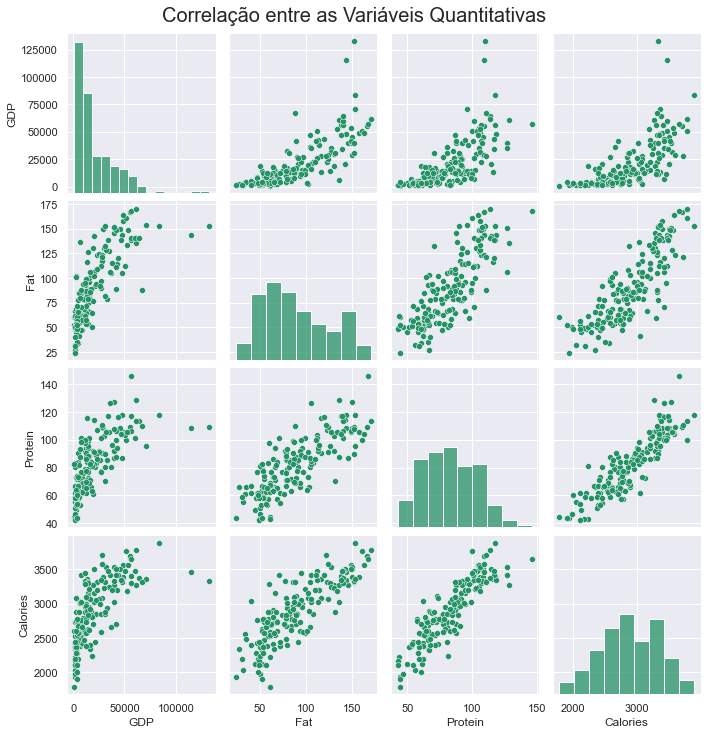

In [31]:
sns.set_palette('summer')
ax = sns.pairplot(data=dataFrame)
ax.fig.suptitle('Correlação entre as Variáveis Quantitativas', y=1.02, fontsize=20)

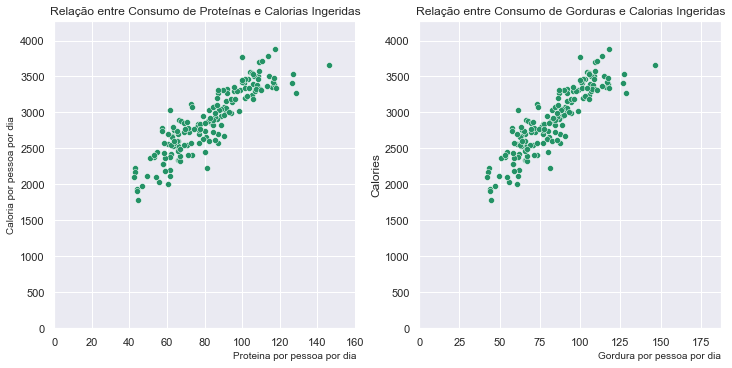

In [32]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)
fig.set_size_inches(10,5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


ax0.set_title('Relação entre Consumo de Proteínas e Calorias Ingeridas', fontsize=12)
ax0.set_xlabel('Proteina por pessoa por dia', loc='right', fontsize=10)
ax0.set_ylabel('Caloria por pessoa por dia', loc='center', fontsize=10)

ax0.set_xlim(xmin=0, xmax=(dataFrame.Protein.max() * 1.1))
ax0.set_ylim(ymin=0, ymax=(dataFrame.Calories.max() * 1.1))

sns.scatterplot(data=dataFrame, x='Protein', y='Calories', ax=ax0)


ax1.set_title('Relação entre Consumo de Gorduras e Calorias Ingeridas', fontsize=12)
ax1.set_xlabel('Gordura por pessoa por dia', loc='right', fontsize=10)

ax1.set_xlim(xmin=0, xmax=(dataFrame.Fat.max() * 1.1))
ax1.set_ylim(ymin=0, ymax=(dataFrame.Calories.max() * 1.1))

sns.scatterplot(data=dataFrame, x='Protein', y='Calories', ax=ax1)


plt.show()

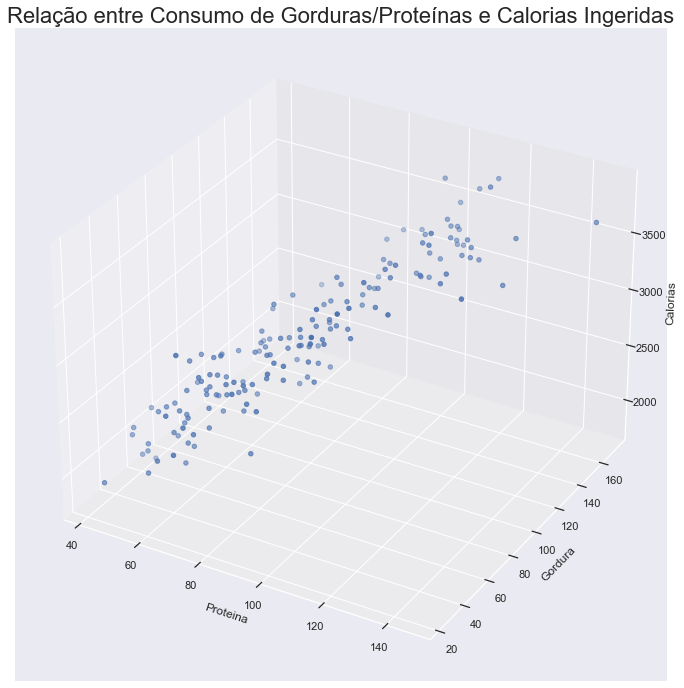

In [33]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection = '3d')


x = dataFrame.Protein
y = dataFrame.Fat
z = dataFrame.Calories

ax.set_title('Relação entre Consumo de Gorduras/Proteínas e Calorias Ingeridas', fontsize=22)

ax.set_xlabel("Proteina")
ax.set_ylabel("Gordura")
ax.set_zlabel("Calorias")

ax.scatter(x, y, z)

plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame[['Protein', 'Fat']], dataFrame.Calories, test_size=0.33, random_state=1234)

lr = LinearRegression().fit(X=X_train, y=y_train) 

cal_pred = lr.predict(X_test)
cal_real = y_test



print(f'Coeficiente de Determinação :{r2_score(cal_real, cal_pred).round(2)}.')
print(f'Erro médio quadrático : {mean_squared_error(cal_real, cal_pred).round(2)}.')
print(f'Raiz do Erro médio quadrático : {np.sqrt(mean_squared_error(cal_real, cal_pred)).round(2)}.')
print(f'Media do consumo de Calorias: {np.round(np.mean(cal_real), 2)}')
print(f'Erro percentual do preditor: {np.round(np.sqrt(mean_squared_error(cal_real, cal_pred)) / np.mean(cal_real) * 100, 2)}%')



Coeficiente de Determinação :0.82.
Erro médio quadrático : 33212.61.
Raiz do Erro médio quadrático : 182.24.
Media do consumo de Calorias: 2834.42
Erro percentual do preditor: 6.43%


In [35]:
print(f'Coeficiente Angular: {lr.coef_.round(3)}')
print(f'Coeficiente Linear: {lr.intercept_.round(3)}')

Coeficiente Angular: [12.732  4.476]
Coeficiente Linear: 1443.752


In [36]:
dataError= pd.DataFrame(X_test)
dataError['Cal_Real'] = y_test
dataError['Cal_Predict'] = cal_pred

dataError['Error'] = dataError['Cal_Real'] - dataError['Cal_Predict']
dataError['Error Pct'] = np.abs(dataError['Error'] / dataError['Cal_Real']) * 100

dataError.index = range(dataError.shape[0])

dataError.head()

,Protein,Fat,Cal_Real,Cal_Predict,Error,Error Pct
0,58.160000,45.560001,2285.0,2388.183364,-103.183364,4.515683
1,59.130001,30.889999,2188.0,2334.866493,-146.866493,6.712363
2,81.290001,50.759998,2235.0,2705.950836,-470.950836,21.071626
3,106.559998,149.100006,3503.0,3467.884693,35.115307,1.002435
4,72.980003,65.919998,2578.0,2668.008332,-90.008332,3.491402


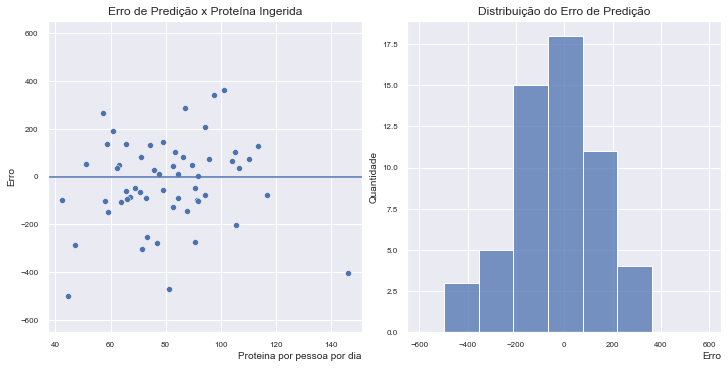

In [37]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)
fig.set_size_inches(10,5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.set_title('Erro de Predição x Proteína Ingerida', fontsize=12)
ax0.set_xlabel('Proteina por pessoa por dia', loc='right', fontsize=10)
ax0.set_ylabel('Erro', loc='center', fontsize=10)
ax0.set_ylim(ymin=-650, ymax=650)
ax0.tick_params(labelsize=8)

ax0 = sns.scatterplot(x=dataError.Protein, y= dataError.Error, ax=ax0)
ax0.axhline(0)


ax1.set_title('Distribuição do Erro de Predição', fontsize=12)
ax1.set_xlabel('Erro', loc='right', fontsize=10)
ax1.set_ylabel('Quantidade', loc='center', fontsize=10)
ax1.set_xlim(xmin=-650, xmax=650)
ax1.tick_params(labelsize=8)

sns.histplot(data=dataError, x="Error", bins=6, ax=ax1)

plt.show()